In [0]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# files = [file for file in os.listdir("./data-analysis/Sales_Data/")]

# tüm_aylar_veri = pd.DataFrame()

# for file in files:
#     df = pd.read_csv("./data-analysis/Sales_Data/" + file)
#     tüm_aylar_veri = pd.concat([tüm_aylar_veri, df])
    
# tüm_aylar_veri.to_csv("tüm_veriler.csv", index=False)

In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/tüm_veriler.csv")

In [0]:
df = df.dropna(how = "all")

In [0]:
df = df[df["Order Date"].str[0:2] != "Or"]


In [0]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype("int32")

In [0]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [0]:
df.insert(4, "Sales", df["Quantity Ordered"] * df["Price Each"])

In [0]:
aylık_satışlar = df.groupby("Month").sum()

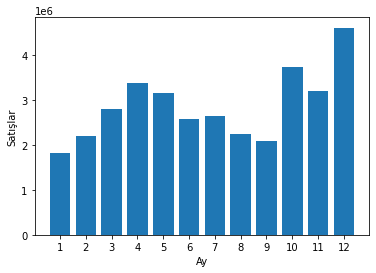

In [0]:
aylar = range(1, 13)

plt.bar(aylar, aylık_satışlar["Sales"])
plt.xticks(aylar)
plt.xlabel("Ay")
plt.ylabel("Satışlar")
plt.show()

In [0]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [0]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1] + " " + x.split(",")[2].split(" ")[1])
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


In [0]:
df.to_csv("rev_data.csv", index=False)

In [0]:
şehir_satış = df.groupby("City", sort=False).sum()
şehir_satış


,Quantity Ordered,Price Each,Sales,Month
City,,,,
Dallas TX,16730,2.752628e+06,2.767975e+06,104620
Boston MA,22528,3.637410e+06,3.661642e+06,141112
Los Angeles CA,33289,5.421435e+06,5.452571e+06,208325
San Francisco CA,50239,8.211462e+06,8.262204e+06,315520
Seattle WA,16553,2.733296e+06,2.747755e+06,104941
Atlanta GA,16602,2.779908e+06,2.795499e+06,104794
New York City NY,27932,4.635371e+06,4.664317e+06,175741
Portland OR,11303,1.860558e+06,1.870732e+06,70621
Austin TX,11153,1.809874e+06,1.819582e+06,69829


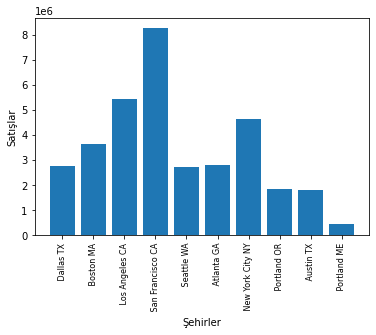

In [0]:
# plt.figure(figsize=(16,8))
plt.bar(şehir_satış.index, şehir_satış["Sales"])
# plt.plot(şehir_satış["Sales"])
plt.xticks(şehir_satış.index, rotation="vertical", size=8)

plt.xlabel("Şehirler")
plt.ylabel("Satışlar")
plt.show()

In [0]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [0]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


In [0]:
df["Hour"] = df["Order Date"].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,9


In [0]:
saat_satış = df.groupby(["Hour"]).count()
saat_satış.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854


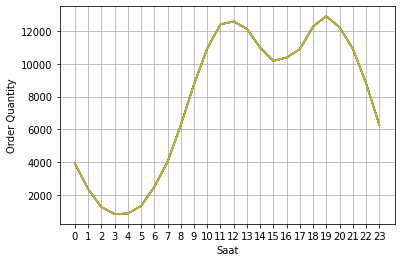

In [0]:
plt.plot(saat_satış)
plt.xticks(saat_satış.index)
plt.grid()
plt.xlabel("Saat")
plt.ylabel("Order Quantity")
plt.show()

In [0]:
order_df = df[df["Order ID"].duplicated(keep=False)]

order_df["Grouped"] = order_df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))

order_df = order_df[["Order ID", "Grouped"]].drop_duplicates()

order_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [0]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in order_df["Grouped"]:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list, 2)))

count.most_common(10)
 



[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

In [0]:
## farklı bi yöntemle aynı(?) sonuç:
# order_df = order_df["Grouped"].str.split(",", expand=True)
# order_df.columns = ["Product-1", "Product-2", "Product-3", "Product-4", "Product-5"]
# order_df.groupby(["Product-1", "Product-2"]).size().sort_values(ascending=False)

In [0]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,9


In [0]:
product_oq = df.groupby("Product", sort=False).sum()
product_oq.head()

,Quantity Ordered,Price Each,Sales,Month,Hour
Product,,,,,
USB-C Charging Cable,23975,261740.85,286501.25,154819,314645
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445
Google Phone,5532,3315000.00,3319200.00,38305,79479
Wired Headphones,20557,226395.18,246478.43,133397,271720
Macbook Pro Laptop,4728,8030800.00,8037600.00,33548,68261


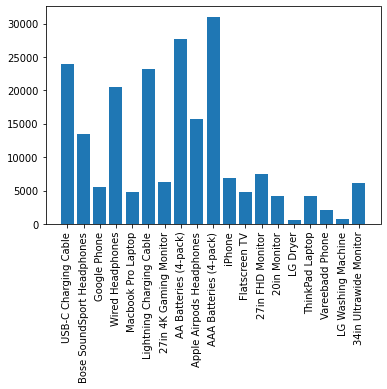

In [0]:
plt.bar(product_oq.index, product_oq["Quantity Ordered"])
plt.xticks(product_oq.index, rotation=90, size=10)
plt.show()

In [0]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,9


In [0]:
df_time_filtered = df.loc[df['Order Date'].between('2019-05-01','2019-08-01')]

# df.loc[df["Order Date"] > "2019-05-01"].sort_values("Order Date")

df_time_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
439,176978,Apple Airpods Headphones,1,150.00,150.00,2019-05-01 03:29:00,"589 Lake St, Portland, OR 97035",5,Portland OR,3
1044,177551,27in FHD Monitor,1,149.99,149.99,2019-05-01 00:13:00,"615 Lincoln St, San Francisco, CA 94016",5,San Francisco CA,0
1282,177778,iPhone,1,700.00,700.00,2019-05-01 00:48:00,"478 West St, Boston, MA 02215",5,Boston MA,0
1283,177778,Apple Airpods Headphones,1,150.00,150.00,2019-05-01 00:48:00,"478 West St, Boston, MA 02215",5,Boston MA,0
2629,179076,Google Phone,1,600.00,600.00,2019-05-01 00:17:00,"635 Chestnut St, San Francisco, CA 94016",5,San Francisco CA,0
